<a href="https://colab.research.google.com/github/aga55-star/ORIE-4580-HW/blob/main/HW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ORIE 4580/5580/5581 Assignment 3

#### Students: A. Agarwal (aga55) and D. Fuentes (dwf64)

### Github link: [example Github link](https://github.com/SidBanerjee/ORIE4580-Simulation/blob/main/Notebooks/Unit0-Intro_Demos.ipynb)

(**Please replace this with your own link!**)

### Instructions


* Due Thursday September 25, at 11.59pm on Gradescope.
* Assignment .ipynb files available for download on [Canvas](https://canvas.cornell.edu/courses/80773#:~:text=Assignments-,Assignments,-Assignments%20module%20publish).
* Do all your work in provided notebook (text answers typeset in markdown; show all required code and generate plots inline), and then generate and submit a pdf.
* Ideally do assignments in groups of 2, and submit a single pdf with both names
* Please show your work and clearly mark your answers.
* You can use any code fragments given in class, found online (for example, on StackOverflow), or generated via Gemini/Claude/ChatGPT (you are encouraged to use these for first drafts) **with proper referencing**.
* You can also discuss with others (again, please reference them if you do so); but you must write your final answers on your own as a team.




### Suggested reading

Chapters 7 (you can skim through this), and chapters 8 and 9 of [Introduction to Probability](https://chance.dartmouth.edu/teaching_aids/books_articles/probability_book/book.html) by Grinstead and Snell.

Chapter 3 and chapter 4 (up to section 4.5) of [Simulation by Ross](https://catalog.library.cornell.edu/catalog/12745977).

In [ ]:
#importing necessary packages
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
from math import log, ceil
%matplotlib inline

<hr><hr>

## Question 1: Combining LCGs (20 points)

In order to avoid biases, simulations should not use anywhere near the full period of an LCG (otherwise, the random sequence repeats\ldots). For example, a typical traffic simulator may have $10,000$ vehicles, each experiencing thousands of random disturbances, thus needing around $10^7$ random samples per replication -- for this, an LCG using $m=2^{31}-1\approx 2\times 10^9$ is insufficient, as after $100$ replications the sequences get correlated.

One method to combine multiple LCGs to obtain a generator with a longer period is to add a smaller period LCG to it. For example, suppose we have two generators $X_{n+1}  =  (a_1 X_n) \mbox{ mod } m_1$ and $Y_{n+1}  =  (a_2 Y_n) \mbox{ mod } m_2$, with $m_1>m_2$. We can derive a combined generator by setting $Z_n  =  (X_n + Y_n) \mbox{ mod } m_1$. If properly designed, the resulting period can be on the order of $m_1m_2$. We will now study a small example to see how this works.


<hr>

**(a)** Consider two LCGs, $x_{n+1} = (5 x_n) \mod 16$ and $y_{n+1} = (2 y_n) \mod 7$. Starting both with seed $x_0 = y_0 = 1$, plot the sequences $x_n, y_n$ using the clock visualization introduced in class (separate plot for each sequence; you can use and modify the code in Demo-PRNGs.ipynb on Canvas).

<hr>

In [ ]:
# Functions to visualize LCG sequence on clock (see demo notebook)
def plot_clock_face(m, fig, annotate=False):
    """
    Plot points on a unit circle representing the LCG sequence on a clock face.

    Parameters:
    m (int): The modulus value for the LCG sequence.
    fig (matplotlib.figure.Figure): The figure object to draw on.
    annotate (bool): Whether to annotate points with their index.

    Returns:
    None
    """
    # Plot m points on the unit circle
    for i in range(m):
        theta = 2.0 * np.pi * i / m
        plt.plot(np.sin(theta), np.cos(theta), 'rs', markersize = 10)
        if annotate:
            plt.annotate(str(i), (np.pi/2 - theta, 1.05), xycoords='polar')

def plot_clock_path(m, x, fig, color='y'):
    """
    Plot the path of an LCG sequence on a clock face.

    Parameters:
    m (int): The modulus value for the LCG sequence.
    x (numpy.ndarray): The LCG sequence.
    fig (matplotlib.figure.Figure): The figure object to draw on.
    color (str): The color for the path.

    Returns:
    None
    """
    # Plot the seed node
    theta_0 = 2.0 * np.pi * (x[0] * (m + 1) - 1) / m
    plt.plot(np.sin(theta_0), np.cos(theta_0), 'gs', markersize = 10)

    # Plot the path of the LCG sequence
    for i in range(len(x) - 1):
        theta_start = 2.0 * np.pi * (x[i] * (m + 1) - 1) / m
        theta_end = 2.0 * np.pi * (x[i + 1] * (m + 1) - 1) / m
        x_start = np.sin(theta_start)
        y_start = np.cos(theta_start)
        del_x = np.sin(theta_end) - np.sin(theta_start)
        del_y = np.cos(theta_end) - np.cos(theta_start)
        if abs(del_x) > 0 or abs(del_y) > 0:
            plt.arrow(x_start, y_start, del_x, del_y,
                      length_includes_head=True, head_width=0.05, head_length=0.1, fc=color, ec=color)

In [ ]:
# Function to generate pseudorandom sequence using LCG
# Set default parameters to glibc specifications (see demo notebook)
def LCG(n, m=2**31-1, a=1103515245, c=12345, seed=1):
    """
    Generate a pseudorandom sequence using a Linear Congruential Generator (LCG).

    Parameters:
    n (int): The number of pseudorandom numbers to generate.
    m (int): The modulus value (default is 2^31-1, following glibc specifications).
    a (int): The multiplier value (default is 1103515245, following glibc specifications).
    c (int): The increment value (default is 12345, following glibc specifications).
    seed (int): The initial seed value (default is 1).

    Returns:
    numpy.ndarray: An array of pseudorandom numbers in the range [0, 1).
    """
    # Initialize an array to store the generated pseudorandom numbers
    output = np.zeros(n)

    x = seed
    for i in range(n):
        # Calculate the pseudorandom number and normalize it to [0, 1)
        output[i] = (x + 1.0) / (m + 1.0)

        # Update the LCG state using the specified parameters
        x = (a * x + c) % m

    return output

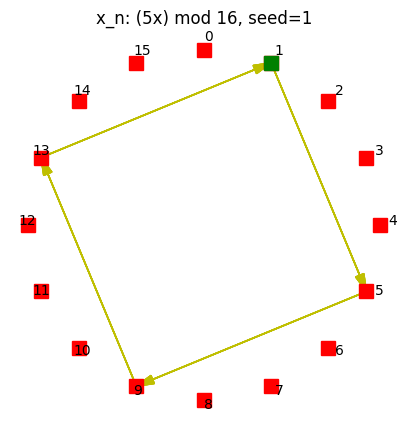

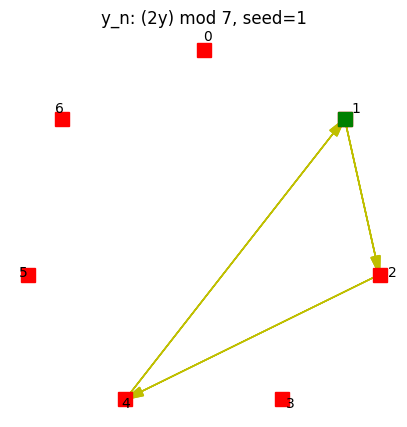

In [ ]:
#Ans
m = 16
a = 5
c = 0
seed = 1

fig = plt.figure(figsize=(5,5))
x = LCG(n=m+1,m=m,a=a,c=c,seed = seed)

plot_clock_face(m,fig,annotate = True)
plot_clock_path(m,x,fig)
#plt.axis('equal')
plt.axis('off')
plt.title("x_n: (5x) mod 16, seed=1")
plt.show()

m = 7
a = 2
c = 0
seed = 1

fig = plt.figure(figsize=(5,5))
y = LCG(n=m+1,m=m,a=a,c=c,seed = seed)

plot_clock_face(m,fig,annotate = True)
plot_clock_path(m,y,fig)
#plt.axis('equal')
plt.axis('off')
plt.title("y_n: (2y) mod 7, seed=1")
plt.show()

<hr>

**(b)** Next, define a combined LCG as $z_{n} = (x_n+y_n) \mod 16$. Starting both the base LCGs with seed $x_0 = y_0 = 1$, plot the sequence $z_n$ using the clock visualization given in class.

<hr>

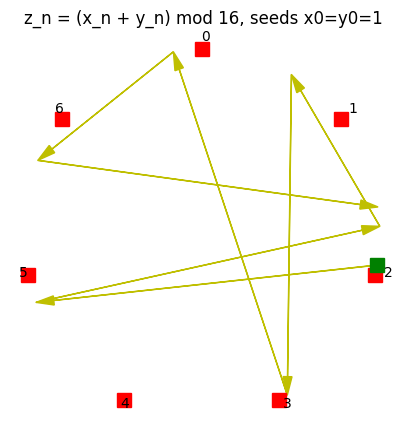

In [ ]:
fig = plt.figure(figsize=(5,5))
x = LCG(n=m+1,m=16,a=5,c=0,seed=1)
y = LCG(n=m+1,m=7,a=2,c=0,seed=1)
z = [(x + y) % 16 for x, y in zip(x, y)]

plot_clock_face(m,fig,annotate = True)
plot_clock_path(m,z,fig)
#plt.axis('equal')
plt.axis('off')
plt.title("z_n = (x_n + y_n) mod 16, seeds x0=y0=1")
plt.show()

___
**(c)** What are the periods of the pseudo-random sequences $x_n, y_n$ and $z_n$?
___

### Ans.

**1. $x_n$:**

$x_n$ = 5$x_{n-1}$ mod 16 , $x_0 = 1$

\
\begin{aligned}
x_0 &= 1 \\
x_1 &= 5  \\
x_2 &= 25 \\
x_3 &= 45 \\
x_4 &= 65 \pmod{16} = 1 \quad \Rightarrow \text{back to start.}
\end{aligned}

**2. $y_n$:**

$y_n$ = 2$y_{n-1}$ mod 7, $y_0 = 1$

\
\begin{aligned}
y_0 &= 1 \\
y_1 &= 2 \\
y_2 &= 4 \\
y_3 &= 8 \pmod{7} = 1 \quad \Rightarrow \text{back to start.}
\end{aligned}

**3. $z_n$:**

$z_n$ = ($x_n$ + $y_n$) mod 16

$z_n$ = (5$x_{n-1}$ + 2$y_{n-1}$) mod 16 ⇒ $x_0 = y_0 = 1$

\
\begin{aligned}
z_0 &= (1+1) = 2 \\
z_1 &= (5+2) = 7 \\
z_2 &= (9+4) = 13 \\
z_3 &= (13+1) = 14 \\
z_4 &= (1+2) = 3 \\
z_5 &= (5+4) = 9 \\
z_6 &= (9+1) = 10 \\
z_7 &= (13+2) = 15 \\
z_8 &= (1+4) = 5 \\
z_9 &= (5+1) = 6 \\
z_{10} &= (9+2) = 11 \\
z_{11} &= (13+4) = 17 \pmod{16} = 1 \\
z_{12} &= (1+1) = 2  \quad \Rightarrow \text{back to start.}
\end{aligned}


Period of $x_n: 4$

Period of $y_n: 3$

Period of $z_n: 12$

___
___
## Question 2: inverting cdfs (25 pts)

In class, we defined $F^{-1}(y)$ for a continuous increasing cdf $F(x)$ as the unique $x$ such that $F(x) = y$ (for $y\in[0,1]$). More generally, for any cdf $F$ we can use the inversion method based on its generalized inverse or *pseudoinverse*:
	$$F^{-1}(y) = \inf\{x|F(x)\geq y\}$$
	(where $\inf$ denotes the \href{https://en.wikipedia.org/wiki/Infimum_and_supremum}{infimum}; if you have not seen this before, treat it as minimum).


___
**(a)** Find the pseudoinverse $F^{-1}(y)$ for the following mixed (discrete/continuous) cdf
	$$F(x)=
	\begin{cases}
	0 & \mbox{for $x < 0$}\\
	x & \mbox{for $0 \leq x < \frac{1}{2}$}, \\
	\frac{1}{2} & \mbox{for $\frac{1}{2}\leq x < 1$}, \\
	1 & \mbox{for $x\geq 1$}
	 \end{cases}$$
___

### Ans.
\
\begin{aligned}
F^{-1}(y) =
\begin{cases}
0, & y=0, \\[6pt]
y, & 0 < y < \tfrac12, \\[6pt]
\tfrac12, & y=\tfrac12, \\[6pt]
1, & \tfrac12 < y \le 1.
\end{cases}
\end{aligned}



___
**(b)** Use the above definition to get an inversion algorithm for the $Geometric(p)$ distribution (with pmf $p(k) = p(1-p)^{k-1}\,\forall\,k\in\{1,2,3,\ldots\}$). Implement this, and generate and plot the histogram of 1000 samples from a $Geometric(0.42)$ distribution.
(For this, it may be useful for you to first understand how the [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html) library works, and in particular, how it provides methods to compute various statistics for many different random variables, including the [geometric r.v.](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.geom.html#scipy.stats.geom))
___

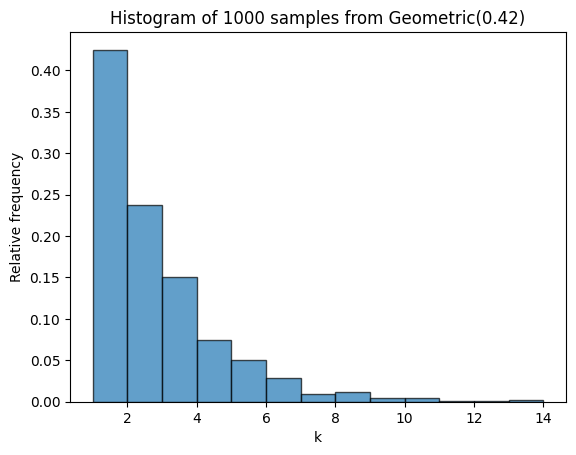

In [ ]:
def geometric_inverse(p, n_samples=1000, seed=None):
    rng = np.random.default_rng(seed)
    U = rng.uniform(0, 1, size=n_samples)
    samples = np.ceil(np.log(1-U) / np.log(1-p)).astype(int)
    return samples

p = 0.42
samples = geometric_inverse(p, n_samples=1000, seed=42)

plt.hist(samples, bins=range(1, max(samples)+2), density=True, alpha=0.7, edgecolor='black')
plt.title("Histogram of 1000 samples from Geometric(0.42)")
plt.xlabel("k")
plt.ylabel("Relative frequency")
plt.show()

___
**(c)** The p.d.f. of the random variable $X$ is given by
	$$
	f(x) =
	\begin{cases}
		e^{x-2} & \text{for }0 \leq x \leq 2, \\
		e^{-x} & \text{for }x > 2, \\
		0 & \text{otherwise,}
	\end{cases}
	$$
	Describe and implement an inversion algorithm to generate samples of $X$. Generate 1,000 samples and plot a histogram. Compare the histogram and the p.d.f.


___

### Ans.

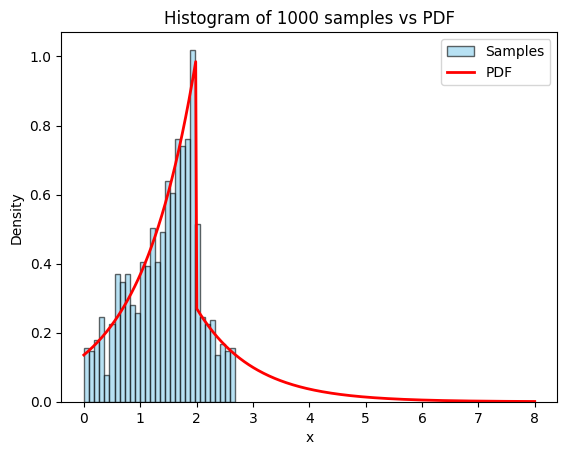

In [ ]:
def sample_X(n_samples=1000, seed=None):
    rng = np.random.default_rng(seed)
    U = rng.uniform(0, 1, n_samples)
    samples = np.zeros_like(U)

    cutoff = 1 - np.exp(-2)

    mask1 = (U <= cutoff)
    samples[mask1] = np.log(1 + U[mask1] * np.exp(2))

    mask2 = ~mask1
    samples[mask2] = -np.log((1 + np.exp(-2) - U[mask2]) / 2)

    return samples

samples = sample_X(1000, seed=42)

x_vals = np.linspace(0, 8, 400)
pdf = np.where(
    (0 <= x_vals) & (x_vals <= 2),
    np.exp(x_vals - 2),
    2 * np.exp(-x_vals))

plt.hist(samples, bins=30, density=True, alpha=0.6, color="skyblue", edgecolor="black", label="Samples")
plt.plot(x_vals, pdf, 'r-', lw=2, label="PDF")
plt.title("Histogram of 1000 samples vs PDF")
plt.xlabel("x")
plt.ylabel("Density")
plt.legend()
plt.show()


<hr><hr>

## Question 3: Acceptance-Rejection (25 pts)

Let the random variable $X$ have density
$$f(x) = \begin{cases} (5 x^4 + 4x^3 + 3x^2+1)/4  & \text{ for } 0 \leq x \leq 1, \\
0 & \text{ otherwise. } \end{cases}$$

<hr>

**(a)** Give an acceptance-rejection algorithm to generate samples of
	$X$.

<hr>

### Ans.

### Acceptance–Rejection sampler for \(X\) on \([0,1]\)

Proper density:
$$
f(x)=\frac{5x^4+4x^3+3x^2+1}{4}, \qquad 0\le x\le 1.
$$

Use $g(x)=1$ on $[0,1]$ (i.e., $Y\sim\mathrm{Unif}(0,1)$).

**$M$:** Since $f(x)$ is increasing on $[0,1]$ (its derivative is positive for ($x>0$), the maximum is at $(x=1)$:
$$
M=\sup_{x\in[0,1]} f(x)=f(1)=\frac{5+4+3+1}{4}=\frac{13}{4}.
$$

**Acceptance probability:** For a proposed $Y$, accept with probability
$$
\frac{f(Y)}{M}
=\frac{\frac{5Y^4+4Y^3+3Y^2+1}{4}}{\frac{13}{4}}
=\frac{5Y^4+4Y^3+3Y^2+1}{13}.
$$

---

#### Algorithm (Acceptance–Rejection)



\begin{array}{l}
\textbf{Repeat:}\\[2pt]
\quad 1.\ \text{Draw } Y \sim \mathrm{Unif}(0,1).\\
\quad 2.\ \text{Draw } U \sim \mathrm{Unif}(0,1) \text{ independently}.\\
\quad 3.\ \text{If } U \le \dfrac{5Y^4+4Y^3+3Y^2+1}{13},\ \text{ set } X\leftarrow Y\ \text{(accept) and stop;}\\
\qquad\ \ \text{else reject and return to step 1.}
\end{array}


**Expected acceptance rate:** $\mathbb{E}[\text{accept}] = \frac{1}{M}=\frac{4}{13}$

In [ ]:


def sample_X(n_samples=1):
    samples = []
    M = 13.0/4

    while len(samples) < n_samples:
        y = np.random.rand()

        u = np.random.rand()


        f_y = (5*y**4 + 4*y**3 + 3*y**2 + 1) / 4
        if u <= f_y / M:
            samples.append(y)

    return np.array(samples)

print(sample_X(10))


[0.56105878 0.5473439  0.91687204 0.80105701 0.80237461 0.75473841
 0.64499008 0.91419562 0.77112591 0.76489676]


<hr>

**(b)** On average, how many samples from the uniform distribution over $[0, 1]$ would your acceptance-rejection algorithm need in order to generate one sample of $X$?

<hr>






### Ans.

The acceptance probability is
$$
p = \frac{1}{M}, \qquad
M = \sup_{x\in[0,1]} f(x) = f(1) = \tfrac{13}{4}.
$$

So
$$
p = \frac{1}{13/4} = \frac{4}{13} 8.
$$

The expected number of proposals needed for one accepted sample is
$$
\mathbb{E}[N] = \frac{1}{p} = M = \tfrac{13}{4} = 3.25.
$$

On average, the algorithm needs **3.25 uniform(0,1) draws** to generate one sample of $X$.



<hr>

**(c)** Use your algorithm in (a) to generate 2,500 samples of $X$. Note that this will require more than 2500 uniform random variables.

Plot a histogram of your sample   and compare it against the true pdf.

<hr>

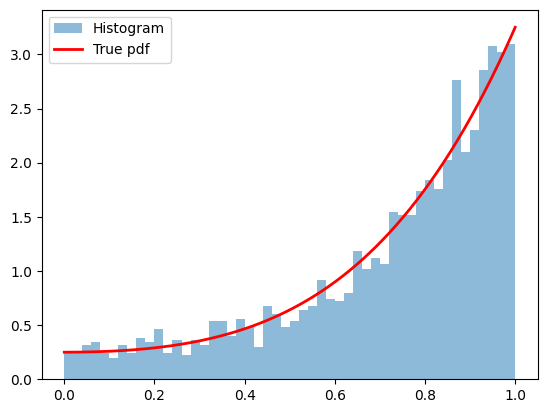

In [ ]:
samples = sample_X(2500)

def f(x):
    return (5*x**4 + 4*x**3 + 3*x**2 + 1) / 4.0

xx = np.linspace(0, 1, 400)

plt.hist(samples, bins=50,range=(0,1), density=True, alpha=0.5, label='Histogram')
plt.plot(xx, f(xx), "r", lw=2, label="True pdf")
plt.legend()
plt.show()

<hr><hr>

## Question 4: Generalized Acceptance-Rejection (30 pts)

We want to generate a $\mathcal{N}(0,1)$ rv $X$, with pdf
$f(x) = \frac{e^{-x^2/2}}{\sqrt{2\pi}} $,
using generalized acceptance-rejection.

<hr>

**(a)** First, suppose we choose the proposal distribution to be a ${Laplace}$ (i.e., two-sided Exponential) distribution, which has pdf $g(x) = e^{-|x|}/2$. Describe (and implement) an inversion algorithm to get samples from this distribution.

<hr>

### Ans.

The proposal distribution is **Laplace(0,1)**, whose pdf is

$$
g(x) = \tfrac{1}{2} e^{-|x|}, \qquad x \in \mathbb{R}.
$$

**CDF:**
- For (x < 0):
$$
G(x) = \int_{-\infty}^x \tfrac{1}{2} e^{-(-t)} \, dt
= \int_{-\infty}^x \tfrac{1}{2} e^{t} \, dt
= \tfrac{1}{2} e^{x}.
$$

- For $(x \ge 0)$:

$$
G(x) = \int_{-\infty}^0 g(t)\,dt + \int_{0}^x g(t)\,dt.
$$

The first term is $\tfrac{1}{2}\$.

The second term:
$$
\int_{0}^x \tfrac{1}{2} e^{-t} \ dt = \tfrac{1}{2} (1 - e^{-x}).
$$

So
$$
G(x) = \tfrac{1}{2} + \tfrac{1}{2}(1 - e^{-x})
= 1 - \tfrac{1}{2} e^{-x}.
$$

Given $(U \sim \text{Unif}(0,1))$:

- If $(0 < U < \tfrac{1}{2})$:
$$
U = \tfrac{1}{2} e^{x} \quad \Rightarrow \quad x = \ln(2U).
$$

- If $(\tfrac{1}{2} \le U < 1)$:

$$
U = 1 - \tfrac{1}{2} e^{-x}
\quad \Rightarrow \quad e^{-x} = 2(1-U)
\quad \Rightarrow \quad x = -\ln\!\big(2(1-U)\big).
$$


$$
X =
\begin{cases}
\ln(2U), & U < \tfrac{1}{2}, \\[6pt]
-\ln\!\big(2(1-U)\big), & U \ge \tfrac{1}{2}.
\end{cases}
$$

To sample from Laplace(0,1):
1. Draw $(U \sim \text{Uniform}(0,1))$.
2. Apply the above transformation to obtain $X$.


In [ ]:
def laplace_inv_cdf(u):
    u = np.asarray(u)
    x = np.empty_like(u, dtype=float)
    left = u < 0.5
    x[left]  = np.log(2.0 * u[left])
    x[~left] = -np.log(2.0 * (1.0 - u[~left]))
    return x

def sample_laplace(n, rng=np.random.default_rng()):
    u = rng.random(n)
    return laplace_inv_cdf(u)

print(sample_laplace(5))


[ 0.27572777  0.12504697  0.18264088 -1.29463139 -2.58123627]


<hr>

**(b)** Determine the smallest $k$ such that $kg(x)\geq f(x)\,\forall\,x\in\mathbb{R}$. Using this, propose (and implement) an acceptance-rejection algorithm for sampling $X\sim\mathcal{N}(0,1)$, and compute the expected number of samples needed for generating each sample.

<hr>

### Ans.

We want to find the smallest constant \(k\) such that
$$
k g(x) \;\;\ge\;\; f(x) \quad \forall x\in\mathbb{R},
$$
where
$$
f(x)=\frac{1}{\sqrt{2\pi}} e^{-x^2/2},
\qquad
g(x)=\tfrac{1}{2} e^{-|x|}.
$$

$$
\frac{f(x)}{g(x)}
= \frac{\tfrac{1}{\sqrt{2\pi}} e^{-x^2/2}}{\tfrac{1}{2} e^{-|x|}}
= \sqrt{\tfrac{2}{\pi}} \, e^{\,|x|-x^2/2}.
$$

Symmetric in $x$, so maximize over $x \ge 0$.


For $x \ge 0$, define
$$
h(x) = x - \tfrac{1}{2}x^2.
$$
Then $h'(x) = 1-x$, so the maximum occurs at $x=1$.

Thus the minimal $k$ is
$$
k = \sup_{x} \frac{f(x)}{g(x)}
= \sqrt{\tfrac{2}{\pi}} \, e^{1/2} \;\;\approx 1.315.
$$


For a proposed value $Y \sim g$, the acceptance probability is

$$
\frac{f(Y)}{k g(Y)}
= \exp\!\Big(-\tfrac{1}{2} (|Y|-1)^2\Big).
$$



1. Generate $Y \sim g$ (Laplace(0,1)) by inversion:
   $$
   Y =
   \begin{cases}
   \ln(2U), & U<\tfrac{1}{2}, \\[6pt]
   -\ln\!\big(2(1-U)\big), & U \ge \tfrac{1}{2},
   \end{cases}
   \qquad U \sim \text{Uniform}(0,1).
   $$

2. Draw $U' \sim \text{Uniform}(0,1)$.

3. Accept $Y$ as a sample $X \sim N(0,1)$ if
   $$
   U' \le \exp\!\Big(-\tfrac{1}{2} (|Y|-1)^2\Big).
   $$
   Otherwise reject and repeat.


<hr>

**(c)** Generate $1000$ samples from your method in part (b), and plot the histogram of the samples. Also report the average and 95\% CI for the number of $U[0,1]$ samples needed to generate the $1000$ samples.

<hr>

Accepted samples: 1000
Total uniforms used: 2750
Empirical avg uniforms/sample: 2.750
Theoretical mean uniforms: 2630.98
Theoretical 95% CI (total): [2551.12, 2710.84]


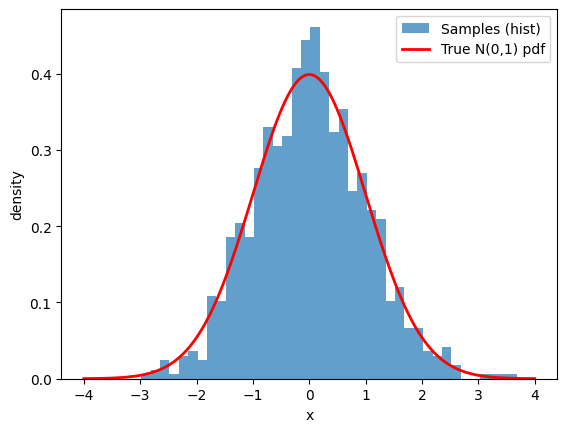

In [ ]:
def ar_normal_from_laplace(n=1000, rng=np.random.default_rng()):
    samples = np.empty(n)
    proposals = 0
    i = 0
    while i < n:
        y = sample_laplace(1, rng=rng)[0]
        u = rng.random()
        proposals += 1
        if u <= np.exp(-0.5 * (abs(y) - 1.0)**2):
            samples[i] = y
            i += 1
    total_uniforms = 2 * proposals
    return samples, proposals, total_uniforms

n=1000

samples, proposals, total_uniforms = ar_normal_from_laplace()

avg_uniforms_per_sample = total_uniforms / n


k = np.sqrt(2/np.pi) * np.exp(0.5)
mean_uniforms = 2 * n * k
var_uniforms  = 4 * n * k * (k - 1)
std_uniforms  = np.sqrt(var_uniforms)
ci_lower = mean_uniforms - 1.96 * std_uniforms
ci_upper = mean_uniforms + 1.96 * std_uniforms

print(f"Accepted samples: {n}")
print(f"Total uniforms used: {total_uniforms}")
print(f"Empirical avg uniforms/sample: {avg_uniforms_per_sample:.3f}")
print(f"Theoretical mean uniforms: {mean_uniforms:.2f}")
print(f"Theoretical 95% CI (total): [{ci_lower:.2f}, {ci_upper:.2f}]")

xx = np.linspace(-4, 4, 400)
true_pdf = 1/np.sqrt(2*np.pi) * np.exp(-xx**2 / 2)

plt.hist(samples, bins=40, density=True, alpha=0.7, label="Samples (hist)")
plt.plot(xx, true_pdf, "r", lw=2, label="True N(0,1) pdf")
plt.xlabel("x")
plt.ylabel("density")
plt.legend()
plt.show()



<hr>

**(d)** Now, suppose instead we choose the proposal distribution to be a Cauchy  distribution with pdf $g(x) = \frac{1}{\pi(1+x^2)}$. Describe and implement an inversion algorithm to get samples from this distribution, and plot the histogram of 1000 samples from this distribution.

<hr>

###Ans.

The proposal distribution is the **standard Cauchy**, with pdf
$$
g(x) = \frac{1}{\pi(1+x^2)}, \qquad x \in \mathbb{R}.
$$

**CDF:**

The cumulative distribution function is
$$
G(x) = \int_{-\infty}^x \frac{1}{\pi(1+t^2)} \, dt
= \frac{1}{\pi} \arctan(x) + \frac{1}{2}.
$$


Let $U \sim \text{Uniform}(0,1)$.  
Set $U = G(x)$ and solve for $x$:

$$
U = \frac{1}{\pi} \arctan(x) + \frac{1}{2}
\quad \Longrightarrow \quad
\arctan(x) = \pi\!\left(U - \tfrac{1}{2}\right).
$$

Taking the tangent of both sides:
$$
x = \tan\!\left(\pi\!\left(U - \tfrac{1}{2}\right)\right).
$$

To sample $X \sim \text{Cauchy}(0,1)$:

1. Generate $U \sim \text{Uniform}(0,1)$.
2. Set
$$
X = \tan\!\big(\pi(U - \tfrac{1}{2})\big).
$$



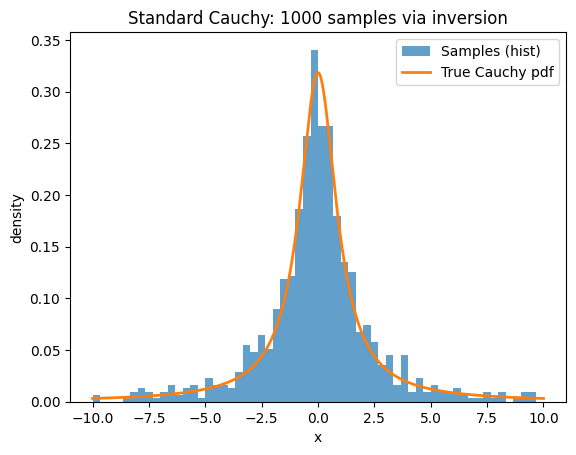

In [ ]:
def cauchy_inv_cdf(u):
    u = np.asarray(u)
    return np.tan(np.pi*(u - 0.5))

def sample_cauchy(n, rng=np.random.default_rng()):
    u = rng.random(n)
    return cauchy_inv_cdf(u)

n = 1000
samples = sample_cauchy(n)

xx = np.linspace(-10, 10, 2000)
true_pdf = 1/(np.pi*(1 + xx**2))

plt.hist(samples, bins=60, range=(-10,10), density=True, alpha=0.7, label="Samples (hist)")
plt.plot(xx, true_pdf, lw=2, label="True Cauchy pdf")
plt.xlabel("x")
plt.ylabel("density")
plt.title("Standard Cauchy: 1000 samples via inversion")
plt.legend()
plt.show()


<hr>

**(e)** Repeat parts $(b)$ and $(c)$ for this proposal distribution.

<hr>

### Ans.

We want the smallest constant $k$ such that
$$
k g(x) \;\;\ge\;\; f(x) \quad \forall x\in\mathbb{R},
$$
where
$$
f(x)=\frac{1}{\sqrt{2\pi}} e^{-x^2/2},
\qquad
g(x)=\frac{1}{\pi(1+x^2)}.
$$


$$
\frac{f(x)}{g(x)}
= \frac{\tfrac{1}{\sqrt{2\pi}} e^{-x^2/2}}{\tfrac{1}{\pi(1+x^2)}}
= \sqrt{\frac{\pi}{2}} \,(1+x^2)\, e^{-x^2/2}.
$$

Symmetric in $x$, so suffices to maximize over $x \ge 0$.

For $x \ge 0$, define
$$
m(x) = (1+x^2)\,e^{-x^2/2}.
$$

Then
$$
\frac{d}{dx}\log m(x) = \frac{2x}{1+x^2} - x.
$$

Setting this equal to zero:
$$
\frac{2x}{1+x^2} - x = 0
\quad \Rightarrow \quad x=0 \;\; \text{or} \;\; x=1.
$$

Evaluating:
$$
m(0)=1, \qquad m(1)=2e^{-1/2}.
$$

The maximum occurs at $x=1$.


$$
k = \sup_x \frac{f(x)}{g(x)}
= \sqrt{\frac{\pi}{2}} \cdot 2 e^{-1/2}
= \sqrt{2\pi}\,e^{-1/2}.
$$

For a proposed value $Y \sim g$, the acceptance probability is
$$
\frac{f(Y)}{k g(Y)}
= \frac{1}{2} (1+Y^2)\, e^{-(Y^2-1)/2}.
$$


1. Generate $Y \sim g$ by inversion:
   $$
   Y = \tan\!\big(\pi(U - \tfrac{1}{2})\big), \quad U \sim \text{Uniform}(0,1).
   $$

2. Draw $U' \sim \text{Uniform}(0,1)$.

3. Accept $Y$ as $X \sim N(0,1)$ if
   $$
   U' \le \tfrac{1}{2}(1+Y^2)\,e^{-(Y^2-1)/2}.
   $$
   Otherwise reject and repeat.

$$
\mathbb{E}[N] = k = \sqrt{2\pi}\,e^{-1/2} \approx 1.5203.
$$


Accepted samples: 1000
Total Uniform(0,1) draws used: 3006
Empirical avg uniforms/sample: 3.0060
Theoretical mean uniforms (total): 3040.69
Theoretical 95% CI (total): [2930.44, 3150.95]


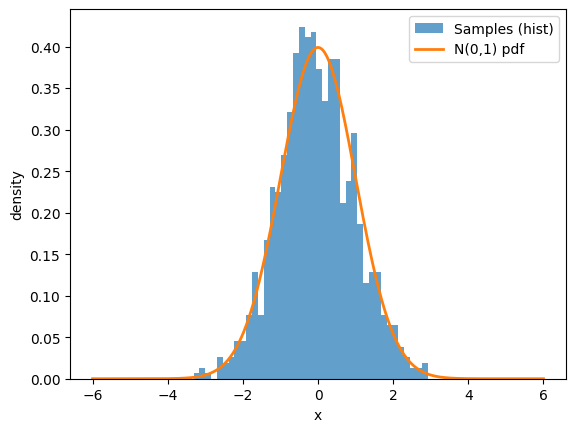

In [ ]:
def sample_cauchy(n, rng=np.random.default_rng()):
    u = rng.random(n)
    return np.tan(np.pi * (u - 0.5))

k = np.sqrt(2*np.pi) * np.exp(-0.5)
p_accept = 1 / k

def ar_normal_from_cauchy(n=1000, rng=np.random.default_rng()):
    samples = np.empty(n)
    proposals = 0
    i = 0
    while i < n:
        y = sample_cauchy(1, rng=rng)[0]
        u = rng.random()
        proposals += 1
        if u <= 0.5 * (1.0 + y*y) * np.exp(-(y*y - 1.0)/2.0):
            samples[i] = y
            i += 1
    total_uniforms = 2 * proposals
    return samples, proposals, total_uniforms

n = 1000
samples, proposals, total_uniforms = ar_normal_from_cauchy(n=n)

avg_uniforms_per_sample = total_uniforms / n

mean_uniforms = 2 * n * k
var_uniforms  = 4 * n * k * (k - 1)
std_uniforms  = np.sqrt(var_uniforms)
ci_lower = mean_uniforms - 1.96 * std_uniforms
ci_upper = mean_uniforms + 1.96 * std_uniforms

print(f"Accepted samples: {n}")
print(f"Total Uniform(0,1) draws used: {total_uniforms}")
print(f"Empirical avg uniforms/sample: {avg_uniforms_per_sample:.4f}")
print(f"Theoretical mean uniforms (total): {mean_uniforms:.2f}")
print(f"Theoretical 95% CI (total): [{ci_lower:.2f}, {ci_upper:.2f}]")

xx = np.linspace(-6, 6, 800)
true_pdf = 1/np.sqrt(2*np.pi) * np.exp(-xx**2 / 2)

plt.hist(samples, bins=40, density=True, alpha=0.7, label="Samples (hist)")
plt.plot(xx, true_pdf, lw=2, label="N(0,1) pdf")
plt.xlabel("x"); plt.ylabel("density")
plt.legend()
plt.show()


.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.